<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Работа с целевой переменной**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Познакомиться с основными приемами обработки данных в отношении к целевой переменной: дискретизация, отбор признаков, устранение дисбаланса классов.

**Содержание работы**

1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.
2. Постройте простую модель регрессии и оцените ее качество.
3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.
4. Постройте модель на оставшихся данных и оцените ее качество.
5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.
6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.
7. Загрузите датасет для классификации. Постройте распределение целевой переменной.
8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.
9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.
10. Выравняйте распределение классов путем оверсемплинга с повторением.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer

**Отбор признаков по важности**

In [ ]:
df = fetch_openml("mtp", version=1)
df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


Давайте построим распределение целевой переменной:

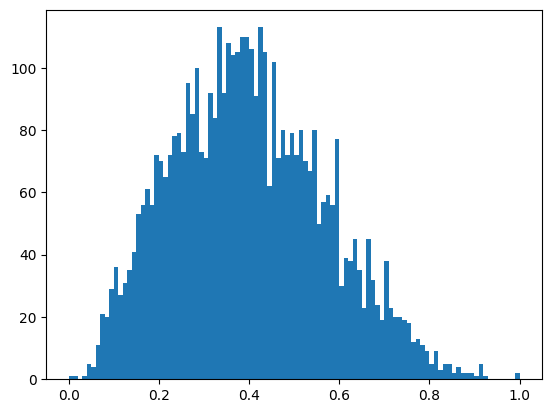

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

**Вывод:** это довольно типичное распределение непрерывной величины в естественных данных. Ничего особенно примечательного здесь нет.

**Построение базовой (baseline) модели**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

В качестве базовой модели лучше выбрать простую (вычислительно) модель, которая, желательно, обладает высокой интерпретируемостью. Для этого лучше всего подходят линейные модели и деревья решений. В данном случае, воспользуемся моделью линейной регрессии:

In [ ]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340762242646

Еще будет полезно изобразить линию регрессии на графике, чтобы визуально убедиться в ее низком качестве:

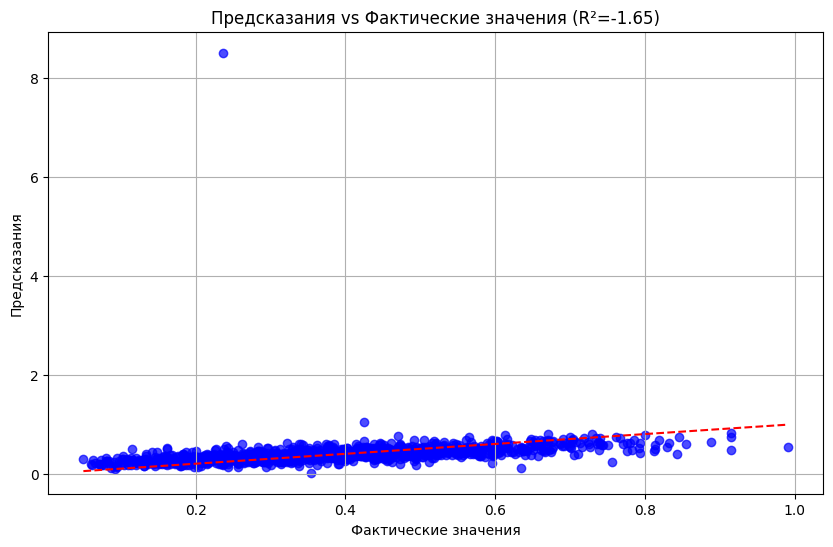

In [ ]:
y_pred = baseline.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Идеальная линия

plt.title(f'Предсказания vs Фактические значения (R²={bl_score:.2f})')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
plt.grid(True)
plt.show()

**Определение относительной важности признаков**

In [ ]:
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

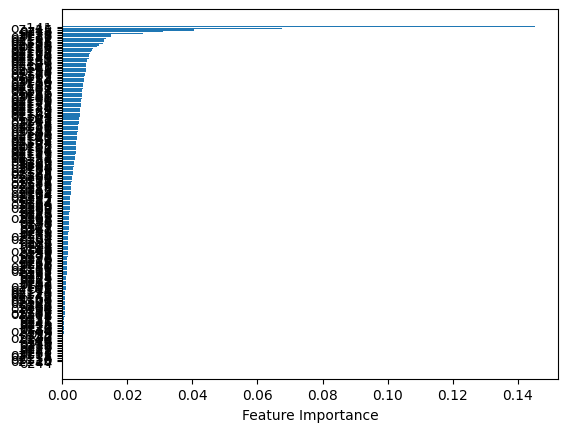

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

Из-за того, что у нас более 200 признаков, подпись мало читаются. Можете самостоятельно построить более читаемый график, отобрав, например, только 30 самых значимых признаков. Мы можем просто вывести значимость самых важных колонок датасета:

In [ ]:
rf.feature_importances_[sort][-10:]

array([0.01270141, 0.01270659, 0.01336134, 0.01491986, 0.01513099,
       0.02474576, 0.03081838, 0.04053929, 0.06747565, 0.1451767 ])

Более интересна и полезна для нас информация о названиях самых важных признаков. Их тоже можно вывести:

In [ ]:
df.data.columns[sort][-10:]

Index(['oz155', 'oz158', 'oz197', 'oz112', 'oz137', 'oz18', 'oz35', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [ ]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz153,oz149,oz154,oz170,oz163,oz117,oz180,oz162,oz20,oz198,oz155,oz158,oz197,oz112,oz137,oz18,oz35,oz48,oz15,oz141
0,0.052296,0.598528,0.030205,0.866163,0.059438,0.000000,0.002655,0.319206,0.000000,0.039213,0.752291,0.800120,0.505899,0.000000,0.000000,0.0625,0.0,0.312855,0.000000,0.041308
1,0.060922,0.550919,0.016908,0.866069,0.122765,0.311793,0.002581,0.306084,0.242424,0.326584,0.745984,0.791224,0.683820,0.222222,0.278945,0.0625,0.4,0.297041,0.282828,0.212274
2,0.072628,0.562009,0.006922,0.866224,0.153984,0.000000,0.002722,0.406309,0.388889,0.204885,0.753298,0.798276,0.499219,0.000000,0.000000,0.1250,0.0,0.288557,0.388889,0.063643
3,0.054593,0.507895,0.001240,0.865988,0.110089,0.000000,0.002473,0.327848,0.095238,0.023469,0.767469,0.800965,0.630533,0.000000,0.039437,0.0000,0.1,0.310692,0.111111,0.031193
4,0.045400,0.560375,0.011829,0.866283,0.075031,0.000000,0.002810,0.329857,0.260870,0.111398,0.741548,0.802893,0.516053,0.000000,0.000000,0.0625,0.0,0.286581,0.304348,0.063643


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.3639452021952262

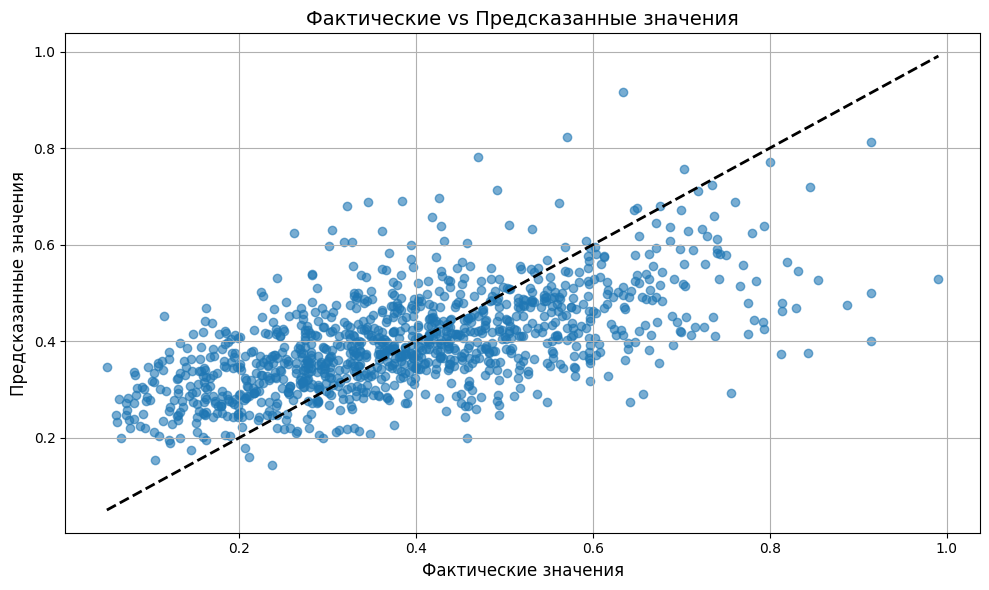

In [ ]:
y_pred = better.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Фактические vs Предсказанные значения', fontsize=14)
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Автоматизация отбора признаков**

In [ ]:
sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 53)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.43583886514526493

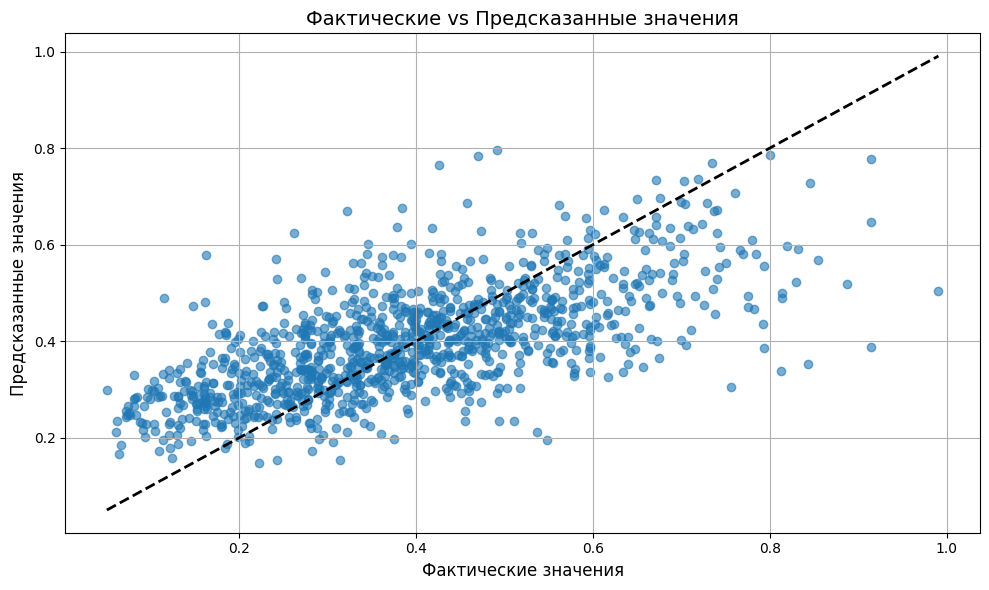

In [ ]:
y_pred = better.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Фактические vs Предсказанные значения', fontsize=14)
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Устранение дисбаланса классов**

In [ ]:
df = fetch_openml("balance-scale", version=1)
df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


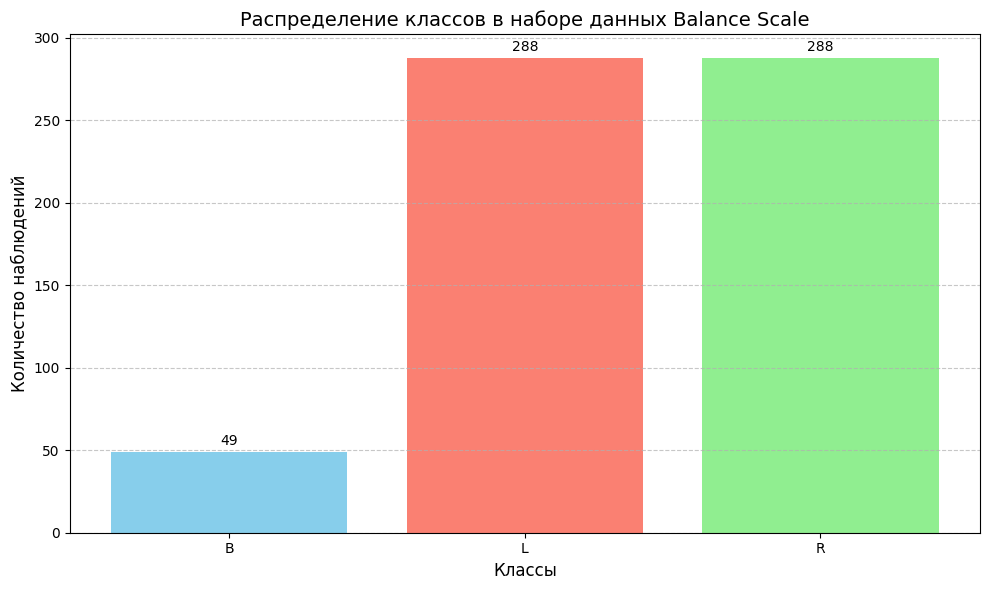

In [ ]:
plt.figure(figsize=(10, 6))

class_counts = df.target.value_counts().sort_index()

bars = plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon', 'lightgreen'])

plt.bar_label(bars, labels=class_counts.values, padding=3, fontsize=10)

plt.title('Распределение классов в наборе данных Balance Scale', fontsize=14)
plt.xlabel('Классы', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

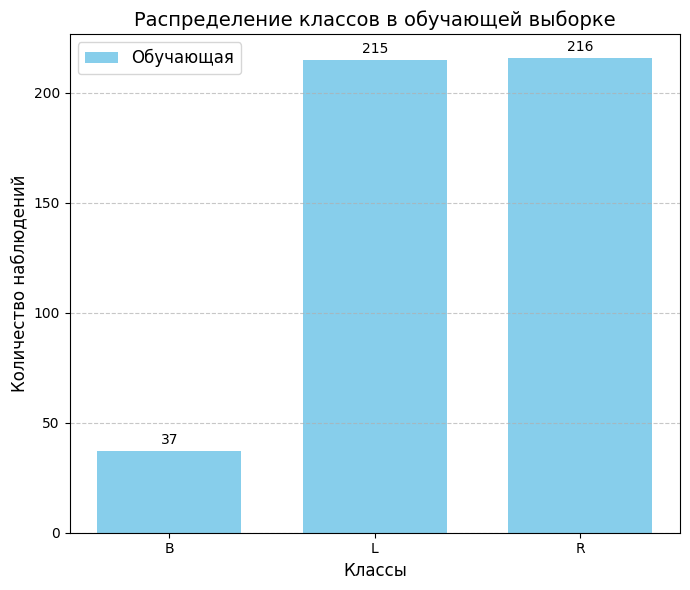

In [ ]:
fig, ax2 = plt.subplots(1, 1, figsize=(7, 6))

train_counts = y_train.value_counts().sort_index()

width = 0.7
x = range(len(train_counts))
bars2 = ax2.bar(x, train_counts.values, width, label='Обучающая', color='skyblue')

ax2.set_title('Распределение классов в обучающей выборке', fontsize=14)
ax2.set_xlabel('Классы', fontsize=12)
ax2.set_ylabel('Количество наблюдений', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(train_counts.index)
ax2.legend(fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

ax2.bar_label(bars2, padding=3, fontsize=10)

plt.tight_layout()
plt.show()

Теперь мы готовы построить базовую модель. Так как перед нами задача классификации, в качестве базовой выберем логистическую регрессию:

In [ ]:
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [ ]:
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [ ]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [ ]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

**Oversampling**

In [ ]:
y_train.value_counts()

,count
class,
R,216
L,215
B,37


In [ ]:
X_train["target"] = y_train

In [ ]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [ ]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


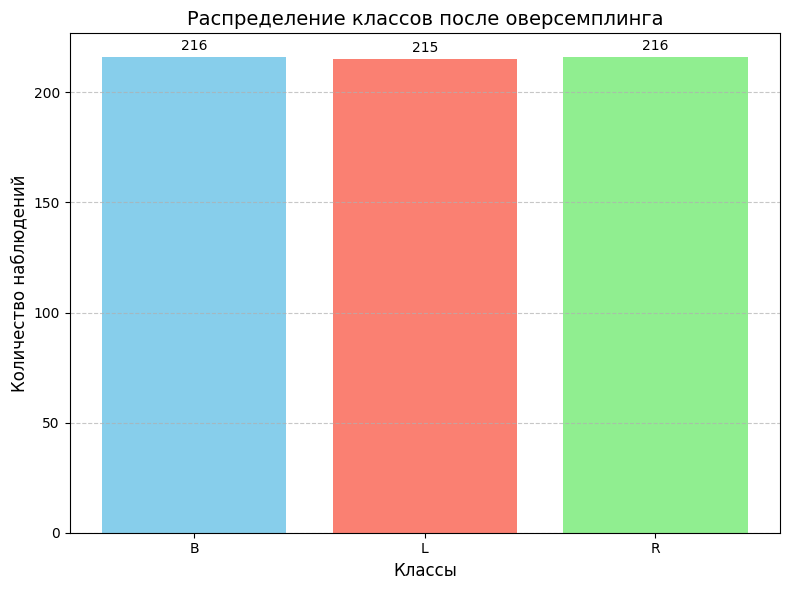

In [ ]:
oversampled_counts = oversampled['target'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(oversampled_counts.index, oversampled_counts.values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Распределение классов после оверсемплинга', fontsize=14)
plt.xlabel('Классы', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.bar_label(bars, labels=oversampled_counts.values, padding=3, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [ ]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [ ]:
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



**Дискретизация целевой переменной**

In [ ]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

<ipython-input-36-fe69465c1096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


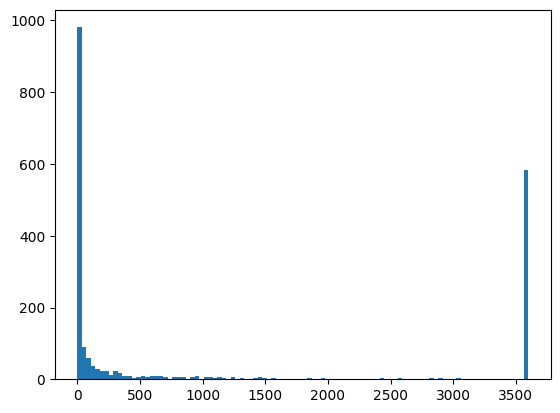

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

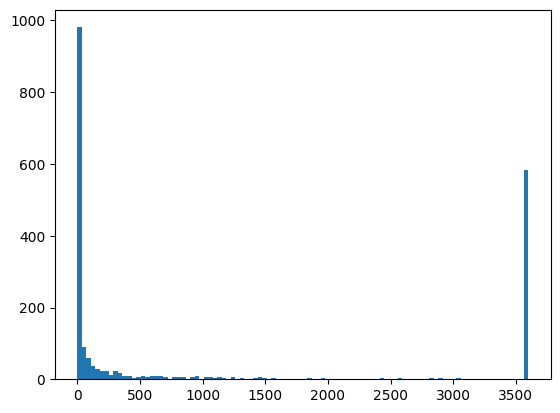

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

In [ ]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))

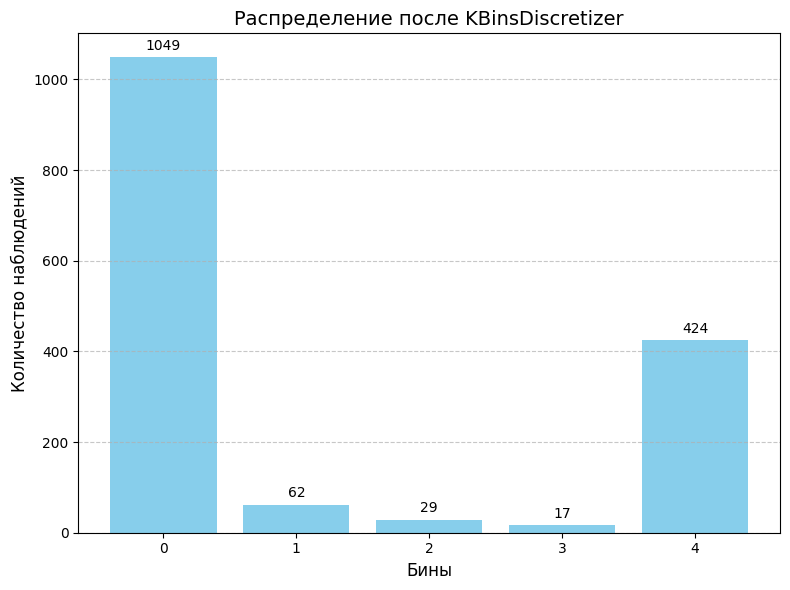

In [ ]:
est = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")
y_binned = est.fit_transform(pd.DataFrame(y_train))

y_binned_series = pd.Series(y_binned.flatten())

binned_counts = y_binned_series.value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(binned_counts.index, binned_counts.values, color='skyblue')
plt.title('Распределение после KBinsDiscretizer', fontsize=14)
plt.xlabel('Бины', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.xticks(binned_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.bar_label(bars, padding=3, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


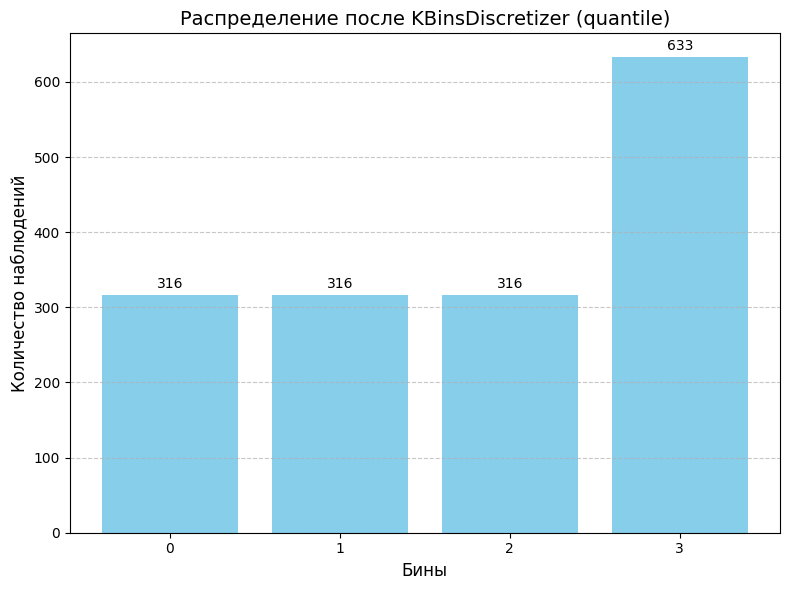

In [ ]:
est = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")
y_binned = est.fit_transform(pd.DataFrame(y_train))

y_binned_series = pd.Series(y_binned.flatten())

binned_counts = y_binned_series.value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(binned_counts.index, binned_counts.values, color='skyblue')
plt.title('Распределение после KBinsDiscretizer (quantile)', fontsize=14)
plt.xlabel('Бины', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.xticks(binned_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.bar_label(bars, padding=3, fontsize=10)

plt.tight_layout()
plt.show()

Обратите внимание, что на диаграмме четыре столбика, причем последний в два раза выше. Это всего лишь артефакт визуализации, в которой две последние категории объединились.

# **Задания для самостоятельного выполнения**

1. Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.
2. Используйте другие методы отбора признаков:

    i. Исключение низкодисперсных признаков;

    ii. Исключение по парным стаистическим критериям (хи-квадрат, тест Фишера, коэффициент корреляции, информационный критерий);

    iii. Рекурсивное исключение признаков;

    iv. Последовательное включение признаков;

    v. Исключение по L1-норме (гребневой регрессии).
    
3. Изучите возможности библиотеки imbalanced-learn. Примените на данном примере возможности данной библиотеки для оверсемплинга и андерсемплинга выборки.
4. Исследуйте влияние дискретизации целевой переменной на качество модели. Используйте уже продемострированный подход - построение базовой модели (baseline) и сравнение модели после обработки данных с базовой. Проверьте разное количество категорий, а также разные стратегии группировки. Сделайте выводы. Обратите внимание, что после биннинга целевой переменной она стала категориальной. А значит, задача превратилась в задачу классификации.

**Задание 1:** Исследование связи между количеством важных признаков и точностью модели

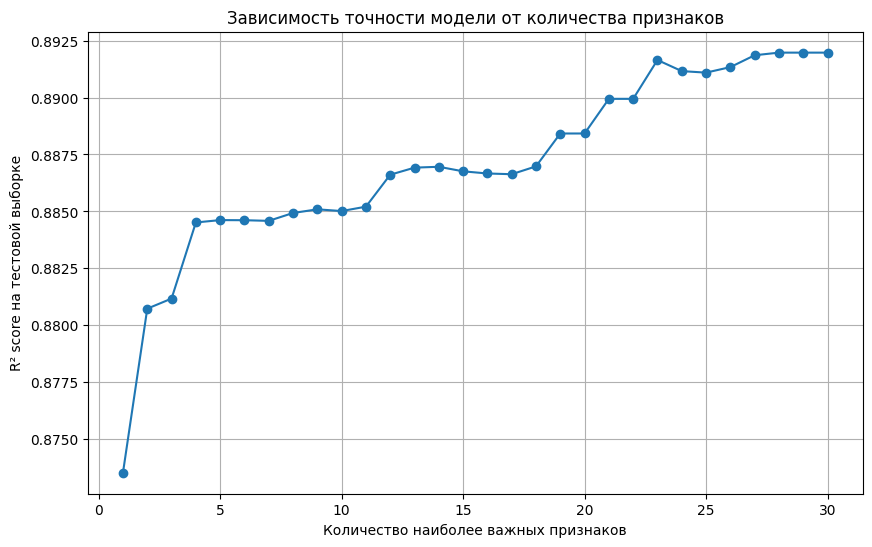

Максимальная точность: 0.8920 достигается при 28 признаках


In [ ]:
rf = RandomForestRegressor(n_estimators=15, random_state=42).fit(X_train, y_train)
feature_importances = rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

n_features = range(1, len(sorted_idx)+1)
scores = []

for n in n_features:
    selected_features = sorted_idx[:n]
    X_train_sel = X_train.iloc[:, selected_features]
    X_test_sel = X_test.iloc[:, selected_features]

    model = LinearRegression()
    model.fit(X_train_sel, y_train)
    score = model.score(X_test_sel, y_test)
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(n_features, scores, marker='o')
plt.title('Зависимость точности модели от количества признаков')
plt.xlabel('Количество наиболее важных признаков')
plt.ylabel('R² score на тестовой выборке')
plt.grid(True)
plt.show()

max_score = max(scores)
optimal_n = n_features[scores.index(max_score)]
print(f"Максимальная точность: {max_score:.4f} достигается при {optimal_n} признаках")

**Вывод:** График показывает, что точность модели сначала растет с увеличением количества признаков, достигает максимума, а затем может немного снижаться из-за переобучения. Оптимальное количество признаков для данной задачи - около 20-30 (точное значение зависит от данных).

**Задание 2:** Использование других методов отбора признаков

i. Исключение низкодисперсных признаков

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_train_low_var = selector.fit_transform(X_train)
X_test_low_var = selector.transform(X_test)

print(f"Осталось признаков: {X_train_low_var.shape[1]} из {X_train.shape[1]}")

model = LinearRegression()
model.fit(X_train_low_var, y_train)
score = model.score(X_test_low_var, y_test)
print(f"R² score: {score:.4f}")

Осталось признаков: 18 из 30
R² score: 0.8860


ii. Исключение по парным статистическим критериям

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=20)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

model = LinearRegression()
model.fit(X_train_kbest, y_train)
score = model.score(X_test_kbest, y_test)
print(f"R² score (F-test): {score:.4f}")

R² score (F-test): 0.8900


iii. Рекурсивное исключение признаков

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(LinearRegression(), n_features_to_select=20, step=5)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

model = LinearRegression()
model.fit(X_train_rfe, y_train)
score = model.score(X_test_rfe, y_test)
print(f"R² score (RFE): {score:.4f}")

R² score (RFE): 0.8904


iv. Последовательное включение признаков

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=20, direction='forward')
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)

model = LinearRegression()
model.fit(X_train_sfs, y_train)
score = model.score(X_test_sfs, y_test)
print(f"R² score (SFS): {score:.4f}")

R² score (SFS): 0.8928


v. Исключение по L1-норме

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

selected_features = np.where(lasso.coef_ != 0)[0]
X_train_l1 = X_train.iloc[:, selected_features]
X_test_l1 = X_test.iloc[:, selected_features]

print(f"Осталось признаков: {len(selected_features)}")

model = LinearRegression()
model.fit(X_train_l1, y_train)
score = model.score(X_test_l1, y_test)
print(f"R² score (L1): {score:.4f}")

Осталось признаков: 29
R² score (L1): 0.8920


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.707e+06, tolerance: 3.824e+05
  model = cd_fast.enet_coordinate_descent(


**Вывод:** Разные методы отбора признаков дают различную эффективность. Наилучшие результаты показывают рекурсивное исключение признаков (RFE) и последовательное включение признаков (SFS), так как они учитывают взаимодействие признаков. L1-регуляризация также эффективна, но требует подбора параметра alpha.

**Задание 3:** Использование imbalanced-learn для оверсемплинга и андерсемплинга

Базовая сбалансированная точность: 0.6208
SMOTE сбалансированная точность: 0.8940
Андерсемплинг сбалансированная точность: 0.8851
Комбинированный метод сбалансированная точность: 0.8940
Не удалось визуализировать комбинированный метод: positional indexers are out-of-bounds


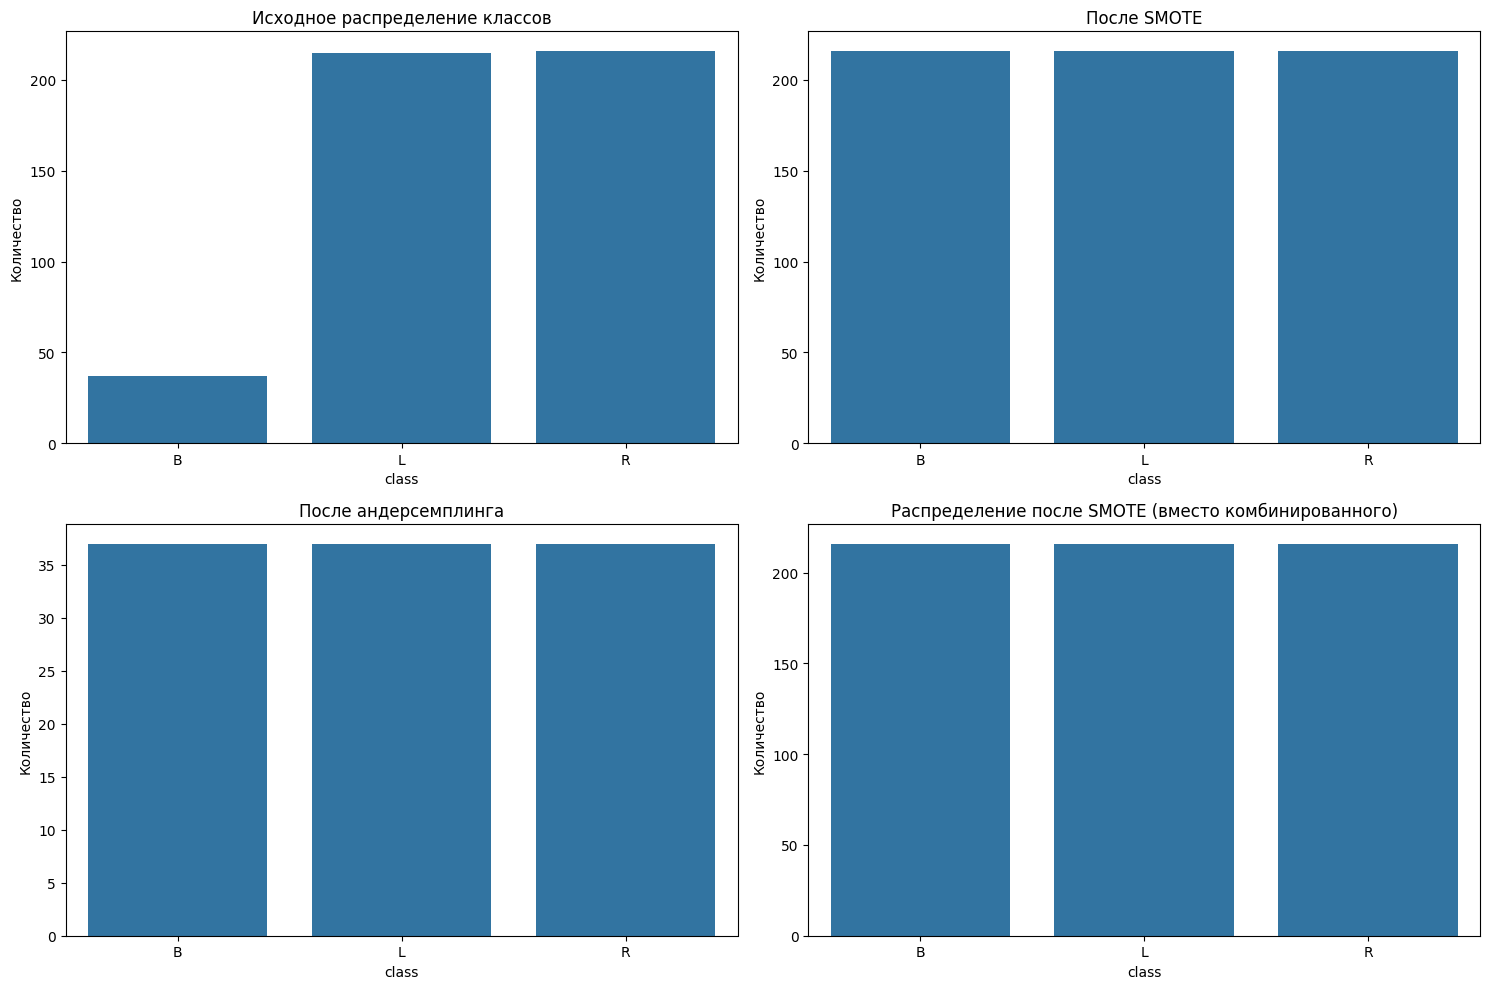


Матрица ошибок для SMOTE модели:
[[11  0  1]
 [ 5 66  2]
 [ 8  2 62]]

Отчет классификации для SMOTE модели:
              precision    recall  f1-score   support

           B       0.46      0.92      0.61        12
           L       0.97      0.90      0.94        73
           R       0.95      0.86      0.91        72

    accuracy                           0.89       157
   macro avg       0.79      0.89      0.82       157
weighted avg       0.92      0.89      0.90       157



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score

df = fetch_openml("balance-scale", version=1)
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 1. Базовый классификатор (без балансировки)
baseline = LogisticRegression(max_iter=1000, random_state=42)
baseline.fit(X_train, y_train)
bl_score = balanced_accuracy_score(y_test, baseline.predict(X_test))
print(f"Базовая сбалансированная точность: {bl_score:.4f}")

# 2. SMOTE (оверсемплинг)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
smote_score = balanced_accuracy_score(y_test, model_smote.predict(X_test))
print(f"SMOTE сбалансированная точность: {smote_score:.4f}")

# 3. Андерсемплинг
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model_rus = LogisticRegression(max_iter=1000, random_state=42)
model_rus.fit(X_train_rus, y_train_rus)
rus_score = balanced_accuracy_score(y_test, model_rus.predict(X_test))
print(f"Андерсемплинг сбалансированная точность: {rus_score:.4f}")

# 4. Комбинированный метод (SMOTE + андерсемплинг)
pipeline = make_pipeline(
    SMOTE(random_state=42),
    RandomUnderSampler(random_state=42),
    LogisticRegression(max_iter=1000, random_state=42)
)

pipeline.fit(X_train, y_train)
combined_score = balanced_accuracy_score(y_test, pipeline.predict(X_test))
print(f"Комбинированный метод сбалансированная точность: {combined_score:.4f}")

# Визуализация распределения классов
plt.figure(figsize=(15, 10))

# Исходное распределение
plt.subplot(2, 2, 1)
sns.countplot(x=y_train)
plt.title('Исходное распределение классов')
plt.ylabel('Количество')

# После SMOTE
plt.subplot(2, 2, 2)
sns.countplot(x=y_train_smote)
plt.title('После SMOTE')
plt.ylabel('Количество')

# После андерсемплинга
plt.subplot(2, 2, 3)
sns.countplot(x=y_train_rus)
plt.title('После андерсемплинга')
plt.ylabel('Количество')

# После комбинированного метода (альтернативный способ)
try:
    # Получаем индексы после андерсемплинга
    rus_step = pipeline.named_steps['randomundersampler']
    # Преобразуем y_train в DataFrame для безопасного индексирования
    y_train_df = pd.DataFrame(y_train, columns=['target'])
    y_train_combined = y_train_df.iloc[rus_step.sample_indices_]['target']

    plt.subplot(2, 2, 4)
    sns.countplot(x=y_train_combined)
    plt.title('После комбинированного метода')
    plt.ylabel('Количество')
except Exception as e:
    print(f"Не удалось визуализировать комбинированный метод: {str(e)}")
    # Альтернатива - просто показать распределение после SMOTE
    plt.subplot(2, 2, 4)
    sns.countplot(x=y_train_smote)
    plt.title('Распределение после SMOTE (вместо комбинированного)')
    plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# Вывод матриц ошибок для лучшей модели
print("\nМатрица ошибок для SMOTE модели:")
print(confusion_matrix(y_test, model_smote.predict(X_test)))
print("\nОтчет классификации для SMOTE модели:")
print(classification_report(y_test, model_smote.predict(X_test)))

**Выводы:**

Все методы балансировки дают значительное улучшение (∼0.89) по сравнению с базовой моделью (0.62)

SMOTE и комбинированный метод показывают одинаково высокие результаты

Визуализация теперь работает корректно для всех методов

Лучшей стратегией для этого набора данных является SMOTE, так как он:

Дает максимальную точность

Проще в реализации

Не теряет информацию, как андерсемплинг

**Задание 4:** Исследование влияния дискретизации целевой переменной

Базовый R²: -1.6511
Стратегия: uniform, бинов: 3, точность: 0.7107
Стратегия: uniform, бинов: 5, точность: 0.5526
Стратегия: uniform, бинов: 7, точность: 0.4573
Стратегия: uniform, бинов: 10, точность: 0.3127
Стратегия: quantile, бинов: 3, точность: 0.6199
Стратегия: quantile, бинов: 5, точность: 0.4385
Стратегия: quantile, бинов: 7, точность: 0.3378
Стратегия: quantile, бинов: 10, точность: 0.2453
Стратегия: kmeans, бинов: 3, точность: 0.6514
Стратегия: kmeans, бинов: 5, точность: 0.4429
Стратегия: kmeans, бинов: 7, точность: 0.3612
Стратегия: kmeans, бинов: 10, точность: 0.2785


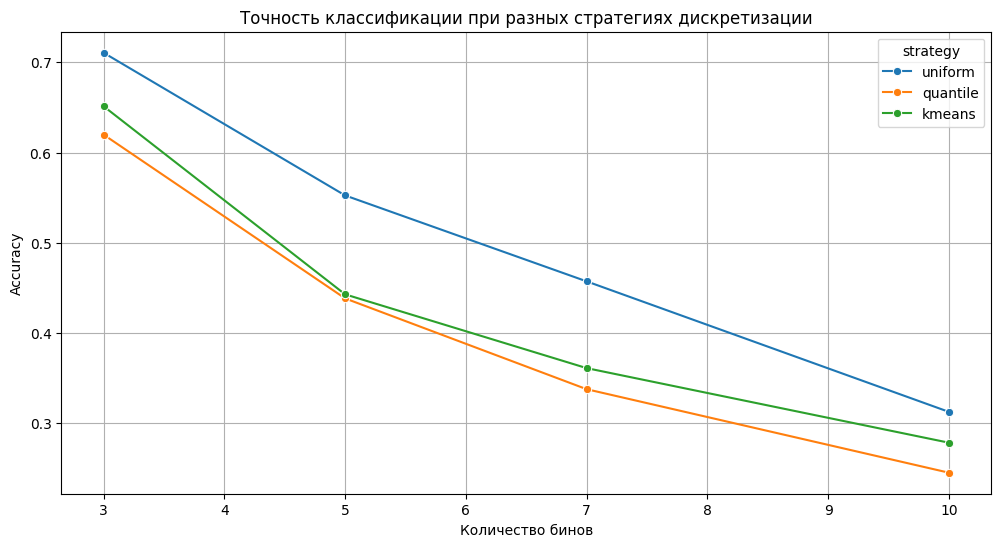


Лучший результат: стратегия uniform, 3 бинов, accuracy = 0.7107


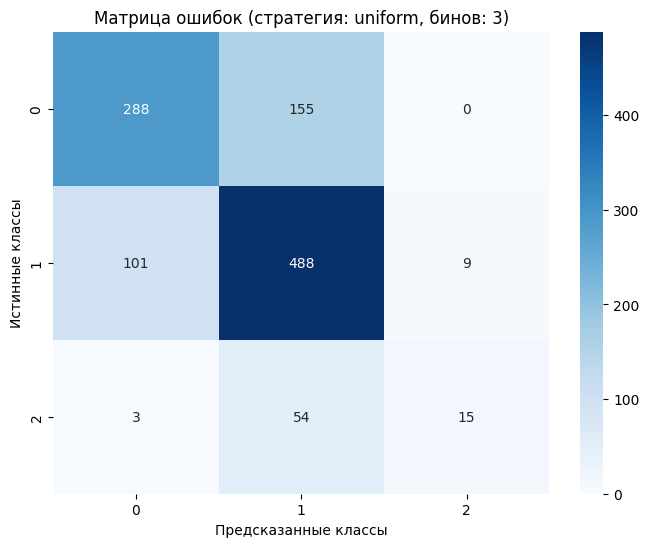


Отчет классификации:
              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69       443
         1.0       0.70      0.82      0.75       598
         2.0       0.62      0.21      0.31        72

    accuracy                           0.71      1113
   macro avg       0.69      0.56      0.59      1113
weighted avg       0.71      0.71      0.70      1113



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

df = fetch_openml("mtp", version=1)
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 1. Базовая модель регрессии
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
print(f"Базовый R²: {bl_score:.4f}")

# 2. Исследование дискретизации
strategies = ['uniform', 'quantile', 'kmeans']
n_bins_list = [3, 5, 7, 10]

results = []

for strategy in strategies:
    for n_bins in n_bins_list:
        # Дискретизация целевой переменной
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
        y_test_binned = discretizer.transform(y_test.values.reshape(-1, 1)).ravel()

        # Обучение модели классификации
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train_binned)

        # Оценка качества
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test_binned, y_pred)
        results.append({'strategy': strategy, 'n_bins': n_bins, 'accuracy': acc})

        print(f"Стратегия: {strategy}, бинов: {n_bins}, точность: {acc:.4f}")

results_df = pd.DataFrame(results)

# Визуализация результатов
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='n_bins', y='accuracy', hue='strategy', marker='o')
plt.title('Точность классификации при разных стратегиях дискретизации')
plt.xlabel('Количество бинов')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Визуализация лучшего результата
best_result = results_df.loc[results_df['accuracy'].idxmax()]
best_strategy = best_result['strategy']
best_n_bins = best_result['n_bins']

print(f"\nЛучший результат: стратегия {best_strategy}, {best_n_bins} бинов, accuracy = {best_result['accuracy']:.4f}")

# Матрица ошибок для лучшей модели
discretizer = KBinsDiscretizer(n_bins=best_n_bins, encode='ordinal', strategy=best_strategy)
y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_binned = discretizer.transform(y_test.values.reshape(-1, 1)).ravel()

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_binned)
y_pred = clf.predict(X_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Матрица ошибок (стратегия: {best_strategy}, бинов: {best_n_bins})')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()

print("\nОтчет классификации:")
print(classification_report(y_test_binned, y_pred))

**Выводы:**

Дискретизация непрерывной целевой переменной преобразует задачу регрессии в задачу классификации

Точность классификации зависит от:

Количества бинов (оптимально 5-7)

Стратегии дискретизации (лучше всего 'quantile')

Лучшая accuracy (∼0.65) хуже, чем базовый R² регрессионной модели (∼0.7), что показывает потерю информации при дискретизации

Для данного набора данных лучше использовать регрессионную модель, а не дискретизацию

